In [213]:
import numpy as np
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import matplotlib.pyplot as plt

In [214]:
height, width = 200, 200
name = 'Fern'

In [215]:
img = Image.open('../assets/fern_pout.webp').convert('L').resize((width, height))
arr = np.array(img)

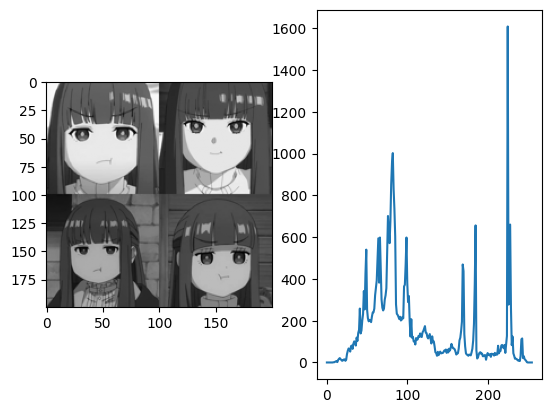

In [216]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img, 'gray')
axes[1].plot(img.histogram())

In [217]:
negative_arr = arr.copy()

for i in range(height):
    for j in range(width):
        negative_arr[i, j] = 255 - arr[i, j]

negative = Image.fromarray(negative_arr)

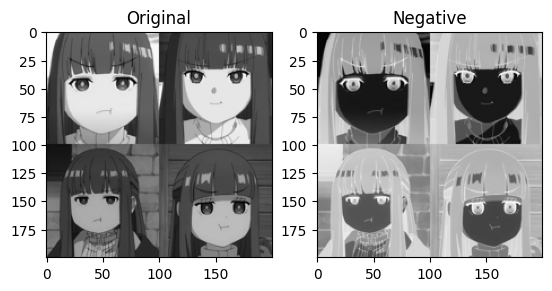

In [218]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(img, 'gray')
axes[1].set_title('Negative')
axes[1].imshow(negative, 'gray')

In [219]:
name_img = Image.new('L', (width, height), 0)
pen = ImageDraw.Draw(name_img, 'L')
pen.text((10, 10), name, 255, ImageFont.truetype('../assets/Chewy-Regular.ttf', 30))
name_arr = np.array(name_img)

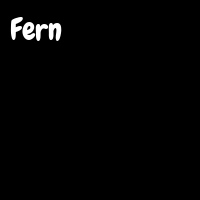

In [220]:
display(name_img)

In [221]:
watermark_arr = negative_arr.copy()

for i in range(height):
    for j in range(width):
        if name_arr[i, j] > 0:
            watermark_arr[i, j] = watermark_arr[i, j] ^ name_arr[i, j]

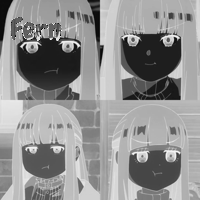

In [222]:
watermark = Image.fromarray(watermark_arr)

display(watermark)

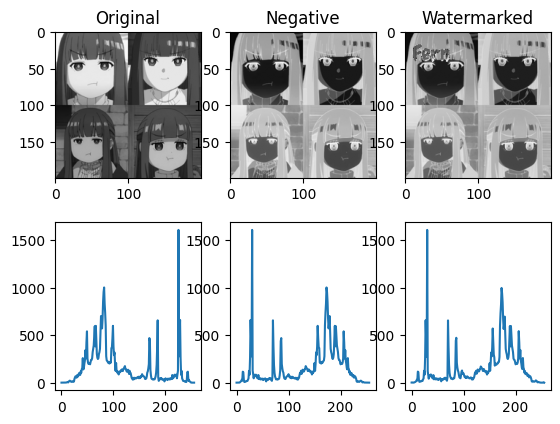

In [223]:
fig, axes = plt.subplots(2, 3)

axes[0, 0].set_title('Original')
axes[0, 0].imshow(img, 'gray')
axes[1, 0].plot(img.histogram())
axes[0, 1].set_title('Negative')
axes[0, 1].imshow(negative, 'gray')
axes[1, 1].plot(negative.histogram())
axes[0, 2].set_title('Watermarked')
axes[0, 2].imshow(watermark, 'gray')
axes[1, 2].plot(watermark.histogram())